In [51]:
import tensorflow as tf
from tensorflow import keras

import numpy
import matplotlib.pyplot as plt

imdb = keras.datasets.imdb

(train_data, train_labels), (test_data, test_labels) = imdb.load_data(num_words=10000)

In [29]:
# Information about the data set
print(train_data.shape)
print(len(train_data[0]))
print(len(train_data[1]))

(25000,)
218
189


In [21]:
# Convert the integers back to words
word_index = imdb.get_word_index()

# The first indices are reserved
word_index = {k:(v+3) for k,v in word_index.items()} 
word_index["<PAD>"] = 0
word_index["<START>"] = 1
word_index["<UNK>"] = 2  # unknown
word_index["<UNUSED>"] = 3

reverse_word_index = dict([(value, key) for (key, value) in word_index.items()])

def decode_review(text):
    return ' '.join([reverse_word_index.get(i, '?') for i in text])

In [23]:
print(decode_review(train_data[0]))

(25000,)
<START> this film was just brilliant casting location scenery story direction everyone's really suited the part they played and you could just imagine being there robert <UNK> is an amazing actor and now the same being director <UNK> father came from the same scottish island as myself so i loved the fact there was a real connection with this film the witty remarks throughout the film were great it was just brilliant so much that i bought the film as soon as it was released for <UNK> and would recommend it to everyone to watch and the fly fishing was amazing really cried at the end it was so sad and you know what they say if you cry at a film it must have been good and this definitely was also <UNK> to the two little boy's that played the <UNK> of norman and paul they were just brilliant children are often left out of the <UNK> list i think because the stars that play them all grown up are such a big profile for the whole film but these children are amazing and should be praise

In [41]:
padded_data = keras.preprocessing.sequence.pad_sequences(train_data, 
                                                         value=word_index["<PAD>"],
                                                        padding='post',
                                                        maxlen= 256)
padded_test_data = keras.preprocessing.sequence.pad_sequences(test_data, 
                                                         value=word_index["<PAD>"],
                                                        padding='post',
                                                        maxlen= 256)


len(padded_data[0]), len(padded_data[0])

(256, 256)

In [43]:
# input shape is the vocabulary count used for the movie reviews (10,000 words)
vocab_size = 10000
model = keras.Sequential()
model.add(keras.layers.Embedding(vocab_size, 16))
model.add(keras.layers.GlobalAveragePooling1D())
model.add(keras.layers.Dense(16, activation = tf.nn.relu))
model.add(keras.layers.Dense(1, activation = tf.nn.sigmoid))

model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, None, 16)          160000    
_________________________________________________________________
global_average_pooling1d (Gl (None, 16)                0         
_________________________________________________________________
dense (Dense)                (None, 16)                272       
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 17        
Total params: 160,289
Trainable params: 160,289
Non-trainable params: 0
_________________________________________________________________


In [45]:
# Use the optimizer:

model.compile(optimizer = tf.train.AdamOptimizer(), 
                    loss = 'binary_crossentropy',
                    metrics = ['accuracy'])


x_val = padded_data[:10000]
partial_x_train = padded_data[10000:]

y_val = train_labels[:10000]
partial_y_train = train_labels[10000:]


history = model.fit(partial_x_train,
                   partial_y_train,
                   epochs=20,
                   validation_data=(x_val, y_val),
                   verbose = 1)

Train on 15000 samples, validate on 10000 samples
Epoch 1/20
15000/15000 [==============================] - 2s 129us/step - loss: 0.6935 - acc: 0.5383 - val_loss: 0.6900 - val_acc: 0.5742
Epoch 2/20
15000/15000 [==============================] - 1s 81us/step - loss: 0.6726 - acc: 0.6510 - val_loss: 0.6384 - val_acc: 0.6386
Epoch 3/20
15000/15000 [==============================] - 1s 84us/step - loss: 0.5739 - acc: 0.7784 - val_loss: 0.5182 - val_acc: 0.8172
Epoch 4/20
15000/15000 [==============================] - 1s 94us/step - loss: 0.4566 - acc: 0.8545 - val_loss: 0.4300 - val_acc: 0.8583
Epoch 5/20
15000/15000 [==============================] - 2s 134us/step - loss: 0.3765 - acc: 0.8859 - val_loss: 0.3772 - val_acc: 0.8672
Epoch 6/20
15000/15000 [==============================] - 1s 92us/step - loss: 0.3216 - acc: 0.9001 - val_loss: 0.3476 - val_acc: 0.8675
Epoch 7/20
15000/15000 [==============================] - 1s 81us/step - loss: 0.2813 - acc: 0.9107 - val_loss: 0.3225 - val_a

In [47]:
results = model.evaluate(padded_test_data, test_labels)
print(results)

25000/25000 [==============================] - 0s 14us/step
[0.35734536674976347, 0.8712]


In [48]:
history_dict = history.history
history_dict.keys()

dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])

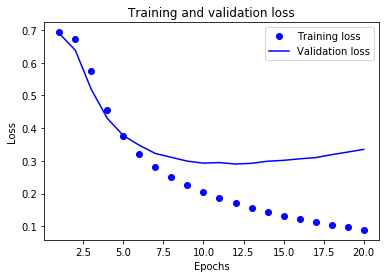

In [52]:
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

# "bo" is for "blue dot"
plt.plot(epochs, loss, 'bo', label='Training loss')
# b is for "solid blue line"
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

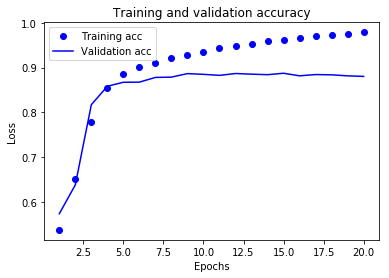

In [53]:
acc_values = history_dict['acc']
val_acc_values = history_dict['val_acc']

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()